# Стохастический градиентный спуск для обучения логистической регрессии. 

Что вы сделаете:

* Разберетесь, как реализовывать log-loss в Python.
* Научитесь вычислять градиент log-loss.
* Потренируетесь обучать модель логистической регрессии с помощью метода стохастического градиентного спуска.

В этом задании будем практиковаться на данных о давлении пациентов. Столбцы в используемой таблице:
*  DBP,  SBP — нормализованные и приведённые к общей шкале показатели давления человека;
*  target — целевая переменная, показывающая, болен человек или нет (болезнь такова, что определяется по показателям давления).

У нас не будет новых данных. Наша цель — построить модель, хорошо объясняющую имеющиеся данные. Поэтому делить данные на части мы не будем, а будем обучать метод на всех данных и на всех данных его проверять.

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv("BloodPressure.csv")

df.head()

,SBP,DBP,target
0,0.943625,-0.679783,1
1,-0.868018,-0.253922,0
2,-1.767471,-0.999924,0
3,0.572276,0.394579,1
4,-1.436026,-1.307645,0


In [ ]:
X = df[['SBP','DBP']]
y = df['target'].values

Напишите функцию для вычисления сигмоиды.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Напишите функцию для вычисления функции потерь логистической регрессии (log-loss).

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

Реализуем стохастический градиентный спуск по формуле

$$w_{new} = w_{prev} - \nabla_w Q(w_{prev},x_i,y_i),$$

где 
*   $\nabla_w Q(w,x_i,y_i)$ — значение градиента функции потерь (в данном случае MSE) на объекте $x_i$;
*   объект $x_i$ случайным образом выбирается на каждой итерации метода.

Реализуйте метод стохастического градиентного спуска для обучения логистической регрессии по аналогии с тем, как мы делали его для обучения линейной регрессии.

Единственное, что поменяется, — надо пересчитать градиент функции потерь (так как теперь функция потерь log-loss, а не MSE).

In [ ]:
def stochastic_gradient_descent(X, y, params, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        ind = random.sample(range(X.shape[0]),1)

        params = params - learning_rate * (X[ind] * (sigmoid(X[ind] @ params) - y[ind])) 
        params = params.ravel() 
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

Создайте функцию для получения предсказания модели.

По аналогии с функцией для предсказания линейной регрессии добавьте к матрице X единичный столбец.

In [ ]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    return np.round(sigmoid(X @ params))

Создадим начальный вектор параметров (весов) модели и заполним его нулями.

Зададим количество итераций стохастического градиентного спуска и градиентный шаг.

In [ ]:
params = np.zeros((X.shape[1],1))

iterations = 1500
learning_rate = 0.03

Обучите модель методом стохастического градиентного спуска (вызовите написанную функцию).

Выведите на экран найденный вектор весов и нарисуйте график, отражающий, как убывает ошибка в зависимости от номера итерации (подпишите оси и добавьте название к графику).

Optimal Parameters are: 
 [-0.44932498  3.20730642 -0.0046442 ] 



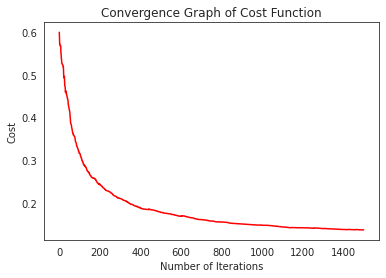

In [ ]:
cost_history, params_optimal = stochastic_gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Сделайте предсказание обученной модели на всех данных X.

In [ ]:
pred = predict(X, params_optimal)

Вычислите долю правильных ответов модели на всех данных X (используйте метрику accuracy).

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, y)

0.968

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

prediction = model.predict(X)

accuracy_score(prediction, y)

0.968